In [421]:
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
from RandomForestForTimeSeriesRegressor import RandomForestForTimeSeriesRegressor, BLOCK_TYPES
from pyts.classification import TimeSeriesForest

In [422]:
dataset = pd.read_csv('../../../datasets/sp_500_stocks/sp500_stocks.csv') #, nrows=1000000)

In [423]:
dataset = dataset.dropna()
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
22525,2010-01-05,AMD,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0
22526,2010-01-06,AMD,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0
22527,2010-01-07,AMD,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0
22528,2010-01-08,AMD,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0
...,...,...,...,...,...,...,...,...
1880749,2024-11-25,ZBRA,400.940002,400.940002,404.320007,398.130005,400.029999,420200.0
1880750,2024-11-26,ZBRA,402.450012,402.450012,403.570007,399.690002,402.440002,369200.0
1880751,2024-11-27,ZBRA,405.750000,405.750000,406.140015,400.929993,403.730011,258300.0
1880752,2024-11-29,ZBRA,407.000000,407.000000,409.029999,405.510010,406.640015,175700.0


In [424]:
# dataset = dataset.loc[(dataset['Symbol'] == "AAPL") | (dataset['Symbol'] == "JNJ") | (dataset['Symbol'] == "JPM") | (dataset['Symbol'] == "XOM") | (dataset['Symbol'] == "PG") | (dataset['Symbol'] == "HD") | (dataset['Symbol'] == "T") | (dataset['Symbol'] == "UNP") | (dataset['Symbol'] == "DUK") | (dataset['Symbol'] == "AMT") | (dataset['Symbol'] == "MDLZ")]
dataset = dataset.loc[(dataset['Symbol'] == "AMT")]

In [425]:
dataset = dataset.sort_values("Date")
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
108866,2010-01-04,AMT,33.184425,43.459999,43.889999,43.279999,43.490002,2750500.0
108867,2010-01-05,AMT,33.734184,44.180000,44.250000,43.400002,43.500000,2575800.0
108868,2010-01-06,AMT,33.909798,44.410000,44.560001,43.770000,44.240002,3215300.0
108869,2010-01-07,AMT,33.818180,44.290001,44.570000,44.009998,44.430000,2615000.0
108870,2010-01-08,AMT,33.886909,44.380001,44.570000,44.009998,44.380001,1934600.0
...,...,...,...,...,...,...,...,...
112615,2024-11-25,AMT,207.550003,207.550003,208.039993,204.699997,205.470001,3605900.0
112616,2024-11-26,AMT,208.000000,208.000000,208.830002,205.369995,206.570007,1791400.0
112617,2024-11-27,AMT,209.300003,209.300003,209.669998,207.830002,208.000000,1669400.0
112618,2024-11-29,AMT,209.000000,209.000000,209.770004,207.529999,209.300003,1610200.0


In [426]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['DateOrdinal'] = dataset['Date'].map(dt.datetime.toordinal)
dataset['average_price'] = dataset[['Low', 'High']].mean(axis=1)
dataset = dataset.drop(columns=['Adj Close', "Volume", "Close", "Open", "Low", "High"])
dataset

,Date,Symbol,DateOrdinal,average_price
108866,2010-01-04,AMT,733776,43.584999
108867,2010-01-05,AMT,733777,43.825001
108868,2010-01-06,AMT,733778,44.165001
108869,2010-01-07,AMT,733779,44.289999
108870,2010-01-08,AMT,733780,44.289999
...,...,...,...,...
112615,2024-11-25,AMT,739215,206.369995
112616,2024-11-26,AMT,739216,207.099998
112617,2024-11-27,AMT,739217,208.750000
112618,2024-11-29,AMT,739219,208.650002


In [427]:
dataset['Symbol'] = pd.factorize(dataset.Symbol)[0]
dataset.reset_index(drop=True, inplace=True)
dataset

,Date,Symbol,DateOrdinal,average_price
0,2010-01-04,0,733776,43.584999
1,2010-01-05,0,733777,43.825001
2,2010-01-06,0,733778,44.165001
3,2010-01-07,0,733779,44.289999
4,2010-01-08,0,733780,44.289999
...,...,...,...,...
3749,2024-11-25,0,739215,206.369995
3750,2024-11-26,0,739216,207.099998
3751,2024-11-27,0,739217,208.750000
3752,2024-11-29,0,739219,208.650002


In [428]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(dataset[['DateOrdinal', 'average_price']])
normalized_dataset = pd.DataFrame(scaled_data)
normalized_dataset["Date"] = dataset["Date"]
normalized_dataset["DateOrdinal"] = normalized_dataset[0]
normalized_dataset["average_price"] = normalized_dataset[1]

normalized_dataset = normalized_dataset.drop(columns=[0, 1])

normalized_dataset

,Date,DateOrdinal,average_price
0,2010-01-04,0.000000,0.017347
1,2010-01-05,0.000184,0.018263
2,2010-01-06,0.000367,0.019561
3,2010-01-07,0.000551,0.020038
4,2010-01-08,0.000734,0.020038
...,...,...,...
3749,2024-11-25,0.998715,0.638652
3750,2024-11-26,0.998898,0.641438
3751,2024-11-27,0.999082,0.647736
3752,2024-11-29,0.999449,0.647354


In [429]:
trainPercent = 80
trainSamples = (len(dataset.index) // 100) * trainPercent
testSamples = len(dataset.index) - trainSamples

In [430]:
# aux = dataset.copy()
#
# X = aux[['Date', 'Symbol']].copy()
# aux = aux.drop(['Date', 'Symbol'], axis=1)
#
# Y = aux.copy()
#
# X_train = X.iloc[:trainSamples]
# Y_train = Y.iloc[:trainSamples]
# X_test = X.iloc[-testSamples:]
# Y_test = Y.iloc[-testSamples:]
#
# X_train

In [431]:
blockSizes = [300, 500, 1000, 3000, 4000]
algorithmList = ["RFTS_Non_Overlapping", "RFTS_MovingBlock", "RFTS_CircularBlock"]
dayTimeWindows = [1825, 730, 365, 180, 30]

symbols = dataset['Symbol'].nunique()
dataset["Symbol"] = dataset["Symbol"] + 1

In [432]:
import matplotlib.pyplot as plt
import numpy as np


def comparativeGraph(y_test, y_pred, timeLinePred, regressorName):


    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.plot(timeLinePred["Date"], y_pred, color='red')
    plt.plot(timeLinePred["Date"], y_test, color='blue')
    plt.title(regressorName)
    plt.show()
    return

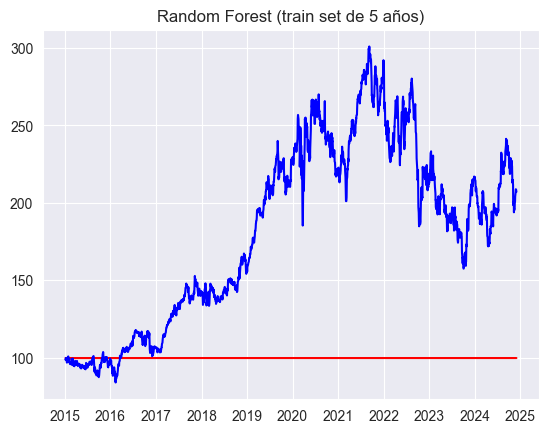

In [433]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import datetime
import random

totalRows = dataset.shape[0]

# for blockSize in blockSizes:
#
#     for algorithm in algorithmList:
#
for days in [1825]:#dayTimeWindows:

    rowIdx = 0# random.randint(0, (totalRows - int(days * 1.3) // symbols))
    initDate = dataset.values[rowIdx][0]
    endDate = initDate + datetime.timedelta(days=days)

    trainSamples = dataset[(dataset['Date'] >= initDate) & (dataset['Date'] < endDate)]
    testSamples = dataset[(dataset['Date'] >= endDate)]

    aux = trainSamples.copy()
    X_train = aux[['DateOrdinal']].copy()
    aux = aux.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
    Y_train = aux.copy().values.ravel()
    aux0 = testSamples.copy()
    X_test = aux0[['DateOrdinal']].copy()
    timeLinePred = aux0[['DateOrdinal', 'Date']].copy()
    aux0 = aux0.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
    Y_test = aux0.copy().values.ravel()


    basicRF = RandomForestRegressor(n_jobs=100, n_estimators=500, max_depth=10)
    basicRF.fit(X_train, Y_train)
    y_pred = basicRF.predict(X_test)

    comparativeGraph(Y_test, y_pred, timeLinePred, "Random Forest (train set de 5 años)")

In [434]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

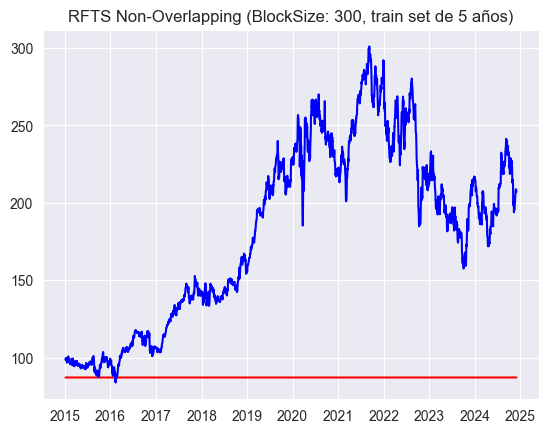

In [435]:
for days in [1825]:#dayTimeWindows:

    rowIdx = 0# random.randint(0, (totalRows - int(days * 1.3) // symbols))
    initDate = dataset.values[rowIdx][0]
    endDate = initDate + datetime.timedelta(days=days)

    trainSamples = dataset[(dataset['Date'] >= initDate) & (dataset['Date'] < endDate)]
    testSamples = dataset[(dataset['Date'] >= endDate)]

    aux = trainSamples.copy()
    X_train = aux[['DateOrdinal']].copy()
    aux = aux.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
    Y_train = aux.copy().values.ravel()
    aux0 = testSamples.copy()
    X_test = aux0[['DateOrdinal']].copy()
    timeLinePred = aux0[['DateOrdinal', 'Date']].copy()
    aux0 = aux0.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
    Y_test = aux0.copy().values.ravel()


    basicRF = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, max_depth=10, block_size=blockSizes[0])
    basicRF.fit(X_train, Y_train)
    y_pred = basicRF.predict(X_test)

    comparativeGraph(Y_test, y_pred, timeLinePred, f"RFTS Non-Overlapping (BlockSize: {blockSizes[0]}, train set de 5 años)")

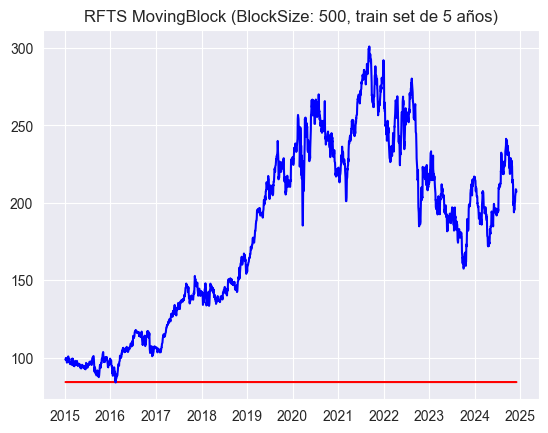

In [436]:
for days in [1825]:#dayTimeWindows:

    rowIdx = 0# random.randint(0, (totalRows - int(days * 1.3) // symbols))
    initDate = dataset.values[rowIdx][0]
    endDate = initDate + datetime.timedelta(days=days)

    trainSamples = dataset[(dataset['Date'] >= initDate) & (dataset['Date'] < endDate)]
    testSamples = dataset[(dataset['Date'] >= endDate)]

    aux = trainSamples.copy()
    X_train = aux[['DateOrdinal']].copy()
    aux = aux.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
    Y_train = aux.copy().values.ravel()
    aux0 = testSamples.copy()
    X_test = aux0[['DateOrdinal']].copy()
    timeLinePred = aux0[['DateOrdinal', 'Date']].copy()
    aux0 = aux0.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
    Y_test = aux0.copy().values.ravel()


    basicRF = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, max_depth=10, block_size=blockSizes[1])
    basicRF.fit(X_train, Y_train)
    y_pred = basicRF.predict(X_test)

    comparativeGraph(Y_test, y_pred, timeLinePred, f"RFTS MovingBlock (BlockSize: {blockSizes[1]}, train set de 5 años)")

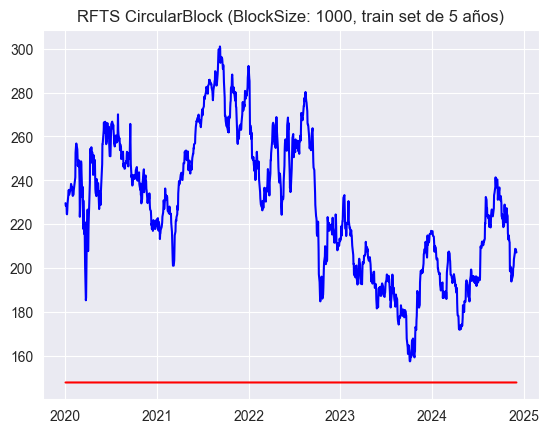

In [440]:
for days in [3650]:#dayTimeWindows:

    rowIdx = 0# random.randint(0, (totalRows - int(days * 1.3) // symbols))
    initDate = dataset.values[rowIdx][0]
    endDate = initDate + datetime.timedelta(days=days)

    trainSamples = dataset[(dataset['Date'] >= initDate) & (dataset['Date'] < endDate)]
    testSamples = dataset[(dataset['Date'] >= endDate)]

    aux = trainSamples.copy()
    X_train = aux[['DateOrdinal']].copy()
    aux = aux.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
    Y_train = aux.copy().values.ravel()
    aux0 = testSamples.copy()
    X_test = aux0[['DateOrdinal']].copy()
    timeLinePred = aux0[['DateOrdinal', 'Date']].copy()
    aux0 = aux0.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
    Y_test = aux0.copy().values.ravel()


    basicRF = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, max_depth=10, block_size=blockSizes[2])
    basicRF.fit(X_train, Y_train)
    y_pred = basicRF.predict(X_test)

    comparativeGraph(Y_test, y_pred, timeLinePred, f"RFTS CircularBlock (BlockSize: {blockSizes[2]}, train set de 5 años)")

In [380]:
dataset

,Date,Symbol,DateOrdinal,average_price
0,2010-01-04,1,733776,43.584999
1,2010-01-05,1,733777,43.825001
2,2010-01-06,1,733778,44.165001
3,2010-01-07,1,733779,44.289999
4,2010-01-08,1,733780,44.289999
...,...,...,...,...
3749,2024-11-25,1,739215,206.369995
3750,2024-11-26,1,739216,207.099998
3751,2024-11-27,1,739217,208.750000
3752,2024-11-29,1,739219,208.650002


In [401]:
def predict(daysList, algorithm, blockSize):
    for days0 in daysList:

        rowIdx0 = 0# random.randint(0, (totalRows - int(days * 1.3) // symbols))
        initDate0 = dataset.values[rowIdx0][0]
        endDate0 = initDate + datetime.timedelta(days=days0)

        trainSamples0 = dataset[(dataset['Date'] >= initDate0) & (dataset['Date'] < endDate0)]
        testSamples0 = dataset[(dataset['Date'] >= endDate0)]

        aux00 = trainSamples0.copy()
        X_train0 = aux00[['DateOrdinal']].copy()
        aux00 = aux00.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
        Y_train0 = aux00.copy().values.ravel()
        aux01 = testSamples0.copy()
        X_test0 = aux01[['DateOrdinal']].copy()
        timeLinePred0 = aux01[['DateOrdinal', 'Date']].copy()
        aux01 = aux01.drop(['Date', 'DateOrdinal', 'Symbol'], axis=1)
        Y_test0 = aux01.copy().values.ravel()

        if algorithm == 'NonOverlapping':
            basicRF0 = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, max_depth=10, block_size=blockSize)
        else:
            if algorithm == 'MovingBlock':
                basicRF0 = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, max_depth=10, block_size=blockSize, block_type=BLOCK_TYPES[1])
            else:
                if algorithm == 'CircularBlock':
                    basicRF0 = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, max_depth=10, block_size=blockSize, block_type=BLOCK_TYPES[2])
                else:
                    blockSize = 1
                    algorithm = "Random Forest"
                    basicRF0 = RandomForestRegressor(n_jobs=100, n_estimators=500, max_depth=10)
        basicRF0.fit(X_train0, Y_train0)
        y_pred0 = basicRF0.predict(X_test0)
        print(y_pred0)
        comparativeGraph(Y_test0, y_pred0, timeLinePred0, f"RFTS {algorithm} (BlockSize: {blockSize}, train set de {days0} días)")

In [402]:
predict([365], "NonOverlapping", 500)

[nan nan nan ... nan nan nan]


ValueError: cannot convert float NaN to integer